### Objective

#### Understand Demand, Revenue, Service Performance, and Operational Behavior.

In [2]:
#importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#creating the dataframe
df = pd.read_excel('C:\\Users\\huzai\\Desktop\\Rapido_Ride_Analysis\\Data\\Cleaned\\rides_cleaned.xlsx')


### Data Set Overview

In [4]:

df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   services          50000 non-null  object        
 1   date              50000 non-null  datetime64[ns]
 2   time              50000 non-null  object        
 3   ride_status       50000 non-null  object        
 4   source            50000 non-null  object        
 5   destination       50000 non-null  object        
 6   duration          50000 non-null  int64         
 7   ride_id           50000 non-null  object        
 8   distance          50000 non-null  float64       
 9   ride_charge       50000 non-null  float64       
 10  misc_charge       50000 non-null  float64       
 11  total_fare        50000 non-null  float64       
 12  payment_method    44964 non-null  object        
 13  Month Name        50000 non-null  object        
 14  Day Name          5000

### Missing Values Check

In [5]:
df.isnull().sum()

services               0
date                   0
time                   0
ride_status            0
source                 0
destination            0
duration               0
ride_id                0
distance               0
ride_charge            0
misc_charge            0
total_fare             0
payment_method      5036
Month Name             0
Day Name               0
Hour                   0
service category       0
services image         0
dtype: int64

In [6]:
df['payment_method'] = df['payment_method'].fillna('Unknown')

### Ride Status Distribution

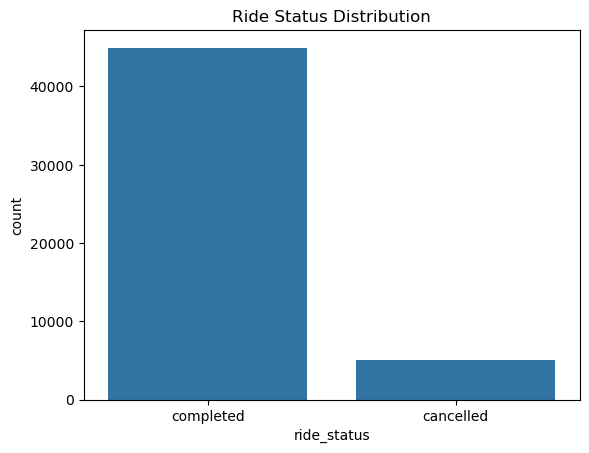

In [7]:
df['ride_status'].value_counts()

sns.countplot(data=df, x='ride_status')
plt.title("Ride Status Distribution")
plt.show()

### Service Demand Analysis

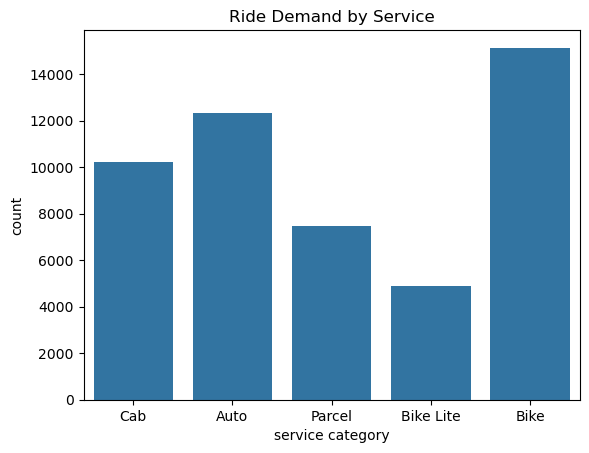

In [8]:
service_demand = df['service category'].value_counts()

sns.countplot(data=df, x='service category')
plt.title("Ride Demand by Service")
plt.show()

### Revenue Analysis

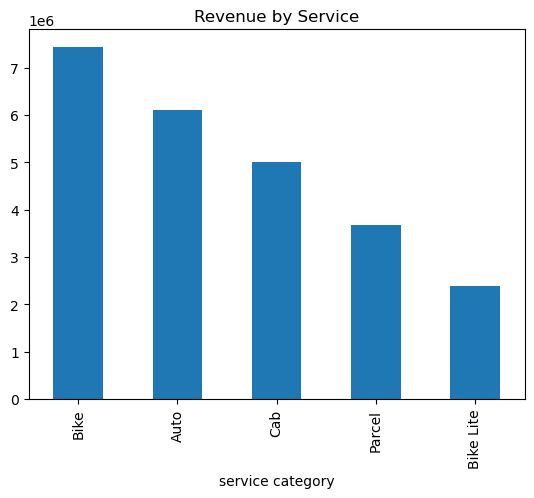

In [9]:
revenue_service = df.groupby('service category')['total_fare'].sum().sort_values(ascending=False)

revenue_service.plot(kind='bar')
plt.title("Revenue by Service")
plt.show()

### Hourly Demand Analysis

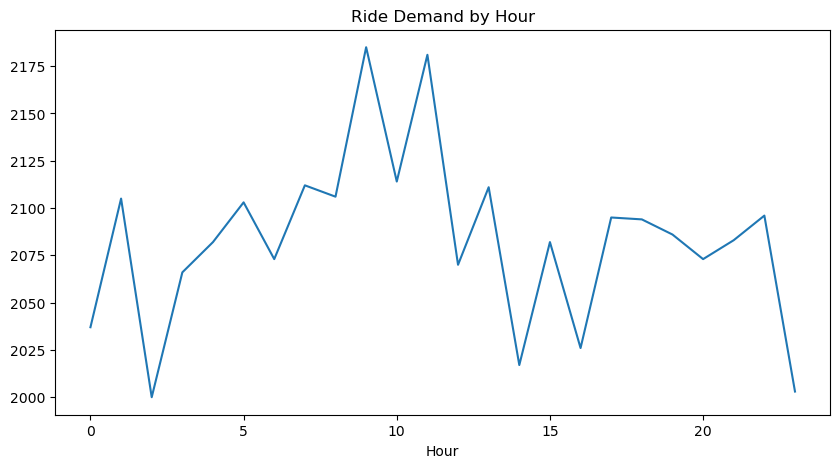

In [10]:
hourly_demand = df.groupby('Hour')['ride_id'].count()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title("Ride Demand by Hour")
plt.show()


### Weekly Demand Pattern

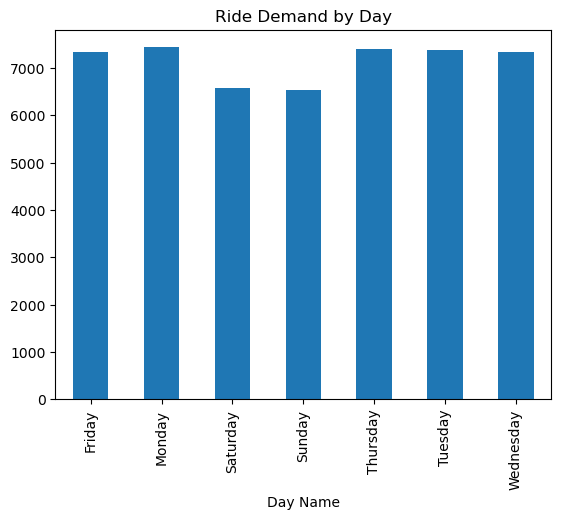

In [11]:
day_demand = df.groupby('Day Name')['ride_id'].count()

day_demand.plot(kind='bar')
plt.title("Ride Demand by Day")
plt.show()

### Payment Behavior

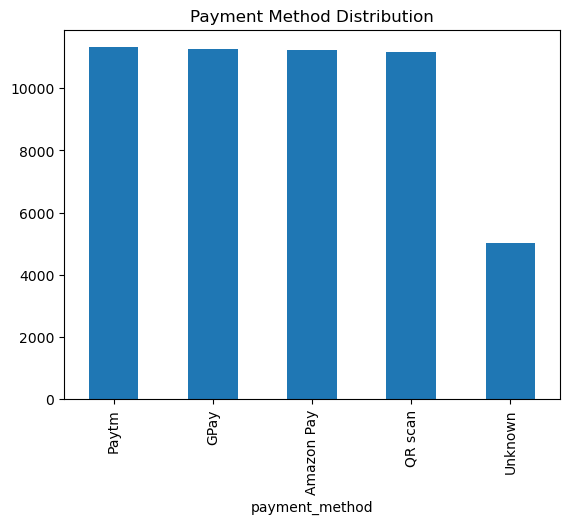

In [12]:
df['payment_method'].value_counts().plot(kind='bar')
plt.title("Payment Method Distribution")
plt.show()


### Cancellation Pattern by Service

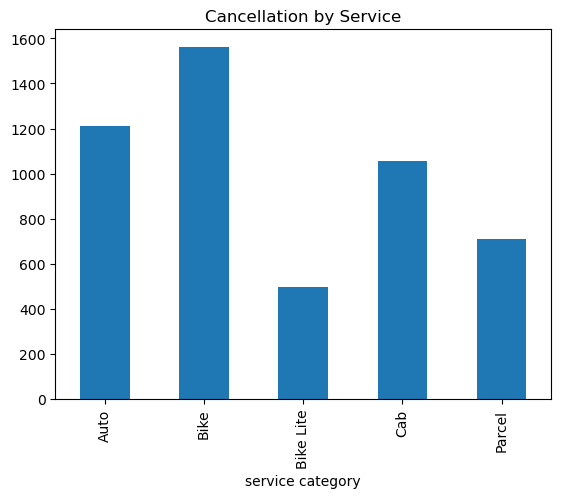

In [14]:
cancelled = df[df['ride_status']=="cancelled"]

cancelled.groupby('service category')['ride_id'].count().plot(kind='bar')
plt.title("Cancellation by Service")
plt.show()


### Revenue per Ride KPI

In [15]:
revenue_per_ride = df.groupby('service category')['total_fare'].mean()
revenue_per_ride

service category
Auto         494.826910
Bike         491.326279
Bike Lite    488.886280
Cab          490.710943
Parcel       494.237049
Name: total_fare, dtype: float64